# Phishing Detection using Supervised Learning

# Importing

In [1]:
## Importing tools
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
import pickle

%matplotlib inline

## model evaluation tools
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score



## Importing Algoritms 
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

# Reading and exploring data

In [2]:
df=pd.read_csv("dataset_phishing.csv")
df.shape

(11430, 89)

In [3]:
df.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


In [4]:
df=pd.DataFrame(df)
df.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


In [5]:
print(df.dtypes) # all the data is int except status which needs to be converted into int format

url                object
length_url          int64
length_hostname     int64
ip                  int64
nb_dots             int64
                    ...  
web_traffic         int64
dns_record          int64
google_index        int64
page_rank           int64
status             object
Length: 89, dtype: object


In [6]:
df['status']

0        legitimate
1          phishing
2          phishing
3        legitimate
4        legitimate
            ...    
11425    legitimate
11426      phishing
11427    legitimate
11428    legitimate
11429      phishing
Name: status, Length: 11430, dtype: object

In [7]:
labels,uniques=pd.factorize(df['status'])

In [8]:
df['status']=labels

In [9]:
uniques

Index(['legitimate', 'phishing'], dtype='object')

In [10]:
df.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,0
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,1
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,1
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,0
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,0


In [11]:
df['status'].value_counts()

0    5715
1    5715
Name: status, dtype: int64

<Axes: >

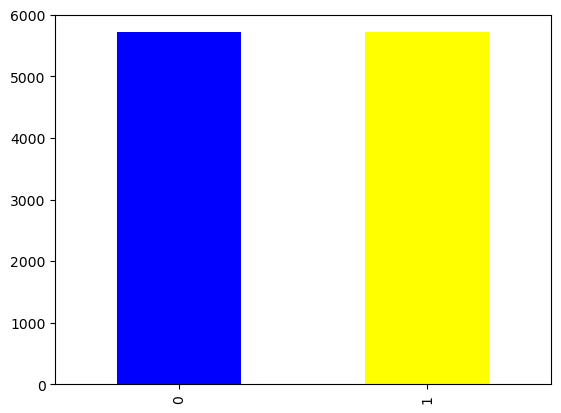

In [12]:
df["status"].value_counts().plot(kind="bar",color=["blue","yellow"])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

In [14]:
df.isna().sum()

url                0
length_url         0
length_hostname    0
ip                 0
nb_dots            0
                  ..
web_traffic        0
dns_record         0
google_index       0
page_rank          0
status             0
Length: 89, dtype: int64

In [15]:
## drop na code

In [16]:
df.describe() # to find the mean,median,std,min,max,etc.

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
count,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,...,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,1.143000e+04,11430.000000,11430.000000,11430.000000,11430.000000
mean,61.126684,21.090289,0.150569,2.480752,0.997550,0.022222,0.141207,0.162292,0.0,0.293176,...,0.775853,0.439545,0.072878,492.532196,4062.543745,8.567566e+05,0.020122,0.533946,3.185739,0.500000
std,55.297318,10.777171,0.357644,1.369686,2.087087,0.155500,0.364456,0.821337,0.0,0.998317,...,0.417038,0.496353,0.259948,814.769415,3107.784600,1.995606e+06,0.140425,0.498868,2.536955,0.500022
min,12.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,-1.000000,-12.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,33.000000,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,1.000000,0.000000,0.000000,84.000000,972.250000,0.000000e+00,0.000000,0.000000,1.000000,0.000000
50%,47.000000,19.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,1.000000,0.000000,0.000000,242.000000,3993.000000,1.651000e+03,0.000000,1.000000,3.000000,0.500000
75%,71.000000,24.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,1.000000,1.000000,0.000000,449.000000,7026.750000,3.738455e+05,0.000000,1.000000,5.000000,1.000000
max,1641.000000,214.000000,1.000000,24.000000,43.000000,4.000000,3.000000,19.000000,0.0,19.000000,...,1.000000,1.000000,1.000000,29829.000000,12874.000000,1.076799e+07,1.000000,1.000000,10.000000,1.000000


In [17]:
pd.crosstab(df.status,df.ip)

ip,0,1
status,,
0,5512,203
1,4197,1518


In [18]:
pd.crosstab(df.status,df.domain_with_copyright)

domain_with_copyright,0,1
status,,
0,2712,3003
1,3694,2021


In [19]:
pd.crosstab(df.status,df.port)

port,0,1
status,,
0,5704,11
1,5699,16


In [20]:
pd.crosstab(df.status,df.nb_redirection)

nb_redirection,0,1,2,3,4,5,6
status,,,,,,,
0,3284,2002,362,54,9,4,0
1,3491,1825,300,74,22,2,1


In [21]:
pd.crosstab(df.status,df.google_index) # seems important

google_index,0,1
status,,
0,4748,967
1,579,5136


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

In [23]:
## add the plotting of the attributes selected by ayan and taniska

In [24]:
# modelling
x = df.drop('status',axis=1)
x=x.drop('url',axis=1)
y = df['status']
np.random.seed(108)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

model1=RandomForestClassifier()
model1.fit(x_train,y_train)

RandomForestClassifier()

In [25]:
v1=model1.score(x_test,y_test)

In [26]:
model2=KNeighborsClassifier()
model2.fit(x_train,y_train)

KNeighborsClassifier()

In [27]:
v2=model2.score(x_test,y_test)

In [28]:
model3=LogisticRegression()
model3.fit(x_train,y_train)

LogisticRegression()

In [29]:
v3=model3.score(x_test,y_test)

In [30]:
model4=AdaBoostClassifier()
model4.fit(x_train,y_train)

AdaBoostClassifier()

In [31]:
v4=model4.score(x_test,y_test)
model_scores={v1,v2}

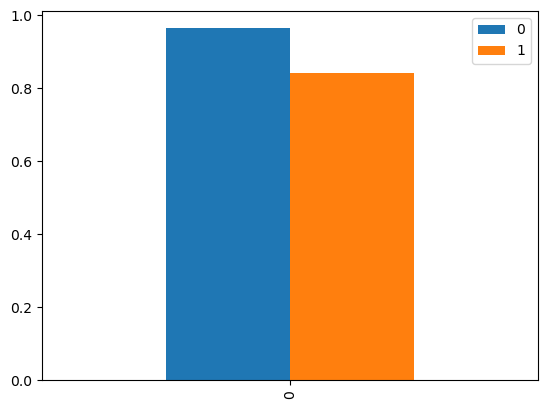

In [32]:
model_compare = pd.DataFrame(model_scores)
model_compare.T.plot.bar();

In [33]:
model4.score(x_test,y_test)

0.9477981918926801

In [34]:
models = {"Logistic Regression":LogisticRegression(),
          "KNN":KNeighborsClassifier(),
          "Random Forest":RandomForestClassifier(),
          "AdaBoostClassifier":AdaBoostClassifier()
         }

# Create a function to fit and score models 
def fit_and_score(models,X_train,X_test,y_train,y_test):
    # Set random seed 
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # loop through models
    for name, model in models.items():
        # Fit the model to the data 
        model.fit(X_train,y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test,y_test)
    return model_scores

# First we will Scale the data for the complete data set

In [35]:
from sklearn import preprocessing

df = df.drop('url',axis=1)

min_max_scaler = preprocessing.MinMaxScaler()
new_data = min_max_scaler.fit_transform(df)

In [36]:
new_data

array([[0.01534684, 0.07142857, 0.        , ..., 1.        , 0.4       ,
        0.        ],
       [0.03990178, 0.09047619, 1.        , ..., 1.        , 0.2       ,
        1.        ],
       [0.06998158, 0.21904762, 1.        , ..., 1.        , 0.        ,
        1.        ],
       ...,
       [0.05709024, 0.05714286, 1.        , ..., 1.        , 1.        ,
        0.        ],
       [0.01596071, 0.12380952, 0.        , ..., 0.        , 0.4       ,
        0.        ],
       [0.2854512 , 0.04761905, 1.        , ..., 1.        , 0.        ,
        1.        ]])

In [37]:
# converting the scalled data to pandas DataFrame

new_data=pd.DataFrame(new_data)
new_data

,0,1,2,3,4,5,6,7,8,9,...,78,79,80,81,82,83,84,85,86,87
0,0.015347,0.071429,0.0,0.086957,0.000000,0.00,0.000000,0.000000,0.0,0.000000,...,0.0,1.0,0.0,0.001542,0.000854,0.000000e+00,1.0,1.0,0.4,0.0
1,0.039902,0.090476,1.0,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.000000,...,1.0,0.0,0.0,0.002615,0.448471,0.000000e+00,0.0,1.0,0.2,1.0
2,0.069982,0.219048,1.0,0.130435,0.023256,0.00,0.333333,0.105263,0.0,0.157895,...,1.0,0.0,0.0,0.000503,0.311656,5.413097e-01,0.0,1.0,0.0,1.0
3,0.003683,0.033333,0.0,0.043478,0.000000,0.00,0.000000,0.000000,0.0,0.000000,...,1.0,0.0,0.0,0.002112,0.000854,1.000382e-02,0.0,0.0,0.3,0.0
4,0.026397,0.052381,0.0,0.043478,0.046512,0.00,0.000000,0.000000,0.0,0.000000,...,0.0,1.0,0.0,0.007543,0.635341,8.102722e-04,0.0,0.0,0.6,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,0.020258,0.061905,0.0,0.043478,0.000000,0.00,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.015052,0.419680,3.696142e-04,0.0,0.0,0.6,0.0
11426,0.044199,0.066667,0.0,0.173913,0.000000,0.25,0.333333,0.000000,0.0,0.052632,...,1.0,0.0,0.0,0.007107,0.523048,0.000000e+00,0.0,1.0,0.0,1.0
11427,0.057090,0.057143,1.0,0.043478,0.139535,0.00,0.333333,0.000000,0.0,0.052632,...,0.0,0.0,0.0,0.094200,0.661726,7.429430e-07,0.0,1.0,1.0,0.0
11428,0.015961,0.123810,0.0,0.043478,0.000000,0.00,0.000000,0.000000,0.0,0.000000,...,1.0,0.0,0.0,0.002883,0.221015,2.280364e-01,0.0,0.0,0.4,0.0


In [38]:
# since the columns names were lost in scaling process so we restore that 

l=df.columns
j=0
for i in df.columns:
    new_data=new_data.rename(columns={j: i})
    j=j+1
    
new_data.head()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,0.015347,0.071429,0.0,0.086957,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,1.0,0.0,0.001542,0.000854,0.000000,1.0,1.0,0.4,0.0
1,0.039902,0.090476,1.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,1.0,0.0,0.0,0.002615,0.448471,0.000000,0.0,1.0,0.2,1.0
2,0.069982,0.219048,1.0,0.130435,0.023256,0.0,0.333333,0.105263,0.0,0.157895,...,1.0,0.0,0.0,0.000503,0.311656,0.541310,0.0,1.0,0.0,1.0
3,0.003683,0.033333,0.0,0.043478,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,1.0,0.0,0.0,0.002112,0.000854,0.010004,0.0,0.0,0.3,0.0
4,0.026397,0.052381,0.0,0.043478,0.046512,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,1.0,0.0,0.007543,0.635341,0.000810,0.0,0.0,0.6,0.0


In [39]:
status=pd.DataFrame()
status=new_data['status']
new_data=new_data.drop('status',axis=1)

In [40]:
# using the scalled data to analyse and identify most important attributes

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = new_data.iloc[:,0:87]  #independent columns
y = status    #target column i.e status
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(25,'Score'))  #print 20 best features

                    Specs        Score
85           google_index  2847.871702
2                      ip  1004.779198
20                 nb_www   631.285213
86              page_rank   603.251699
30       tld_in_subdomain   473.719023
77            empty_title   428.838710
33          prefix_suffix   420.136560
6                   nb_qm   310.424618
25       ratio_digits_url   301.381630
78        domain_in_title   301.077582
50            phish_hints   278.507742
26      ratio_digits_host   250.760241
82             domain_age   231.578842
55     statistical_report   217.441435
69         ratio_intMedia   213.149404
79  domain_with_copyright   191.943471
31     abnormal_subdomain   183.680162
84             dns_record   167.026087
57    ratio_intHyperlinks   160.054949
70         ratio_extMedia   142.879750
74            safe_anchor   141.547931
66       external_favicon   136.965572
54         suspecious_tld   136.043902
67          links_in_tags   128.912288
35     shortening_service

In [41]:
dt=pd.DataFrame()

dt['google_index']=x['google_index']
dt['ip']=x['ip']
dt["nb_www"]=x['nb_www']
dt['page_rank']=x['page_rank']
dt['tld_in_subdomain']=x['tld_in_subdomain']
dt['empty_title']=x['empty_title']
dt['prefix_suffix']=x['prefix_suffix']
dt['nb_qm']=x['nb_qm']
dt['ratio_digits_url']=x['ratio_digits_url']
dt['domain_in_title']=x['domain_in_title']
dt['phish_hints']=x['phish_hints']
dt['ratio_digits_host']=x['ratio_digits_host']
dt['domain_age']=x['domain_age']
dt['statistical_report']=x['statistical_report']
dt['ratio_intMedia']=x['ratio_intMedia']
dt['domain_with_copyright']=x['domain_with_copyright']

## if necesary add attributes as much needed

In [42]:
dt.shape,status.shape

((11430, 16), (11430,))

In [43]:
tempsv=dt
tempsv['status']=status
tempsv.to_csv('filename.csv', index = False, encoding='utf-8') 

# Initial modelling

In [44]:
models = {
          "Logistic Regression":LogisticRegression(),
          "KNN":KNeighborsClassifier(),
          "Random Forest":RandomForestClassifier(),
          "AdaBoostClassifier":AdaBoostClassifier(),
          "Ridge":Ridge(),
          "Lasso":Lasso(),
          "ElasticNet":ElasticNet(),
          "DecisionTreeClassifier":DecisionTreeClassifier(),
          "GradientBoostingClassifier":GradientBoostingClassifier(),
          "ExtraTreesClassifier":ExtraTreesClassifier(),
          "SVC":SVC(),
          "SVR":SVR(),
          "GaussianNB":GaussianNB(),
          "GaussianProcessClassifier":GaussianProcessClassifier(),
          "MLPClassifier":MLPClassifier(),
          "LinearDiscriminantAnalysis":LinearDiscriminantAnalysis(),
          "QuadraticDiscriminantAnalysis":QuadraticDiscriminantAnalysis()
         }

new_models={
          "Random Forest":RandomForestClassifier(),
          "ExtraTreesClassifier":ExtraTreesClassifier(),
          "GradientBoostingClassifier":GradientBoostingClassifier(),
          "AdaBoostClassifier":AdaBoostClassifier(),
          "DecisionTreeClassifier":DecisionTreeClassifier(),
          "MLPClassifier":MLPClassifier(),
          "Logistic Regression":LogisticRegression()
#           "LinearDiscriminantAnalysis":LinearDiscriminantAnalysis()
}

# Create a function to fit and score models 
def fit_and_score(models,X_train,X_test,y_train,y_test):
    # Set random seed 
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # loop through models
    for name, model in models.items():
        
        

        
        
        
        # Find the best hyperparameters 
#         rs_rf.best_params_

        # Evaluate the randomized serach RandomForestClassifier model
#         rs_rf.score(x_test,y_test)
        
        
        # Fit the model to the data 
        model.fit(X_train,y_train)
        
        # saving the model
        pickle.dump(rs_rf,open(name+".pkl","wb"))
        
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test,y_test)
    return model_scores

In [45]:
# modelling
x = dt.drop('status',axis=1)
y = dt['status']
np.random.seed(108)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

model1=RandomForestClassifier()
model1.fit(x_train,y_train)

RandomForestClassifier()

In [46]:
# model_scores = fit_and_score(models = new_models,
#                              X_train = x_train,
#                              X_test = x_test,
#                              y_train = y_train,
#                              y_test = y_test)
# model_scores

# HyperParameter Tuning

In [47]:
model={
          "Random Forest":RandomForestClassifier(),
          "ExtraTreesClassifier":ExtraTreesClassifier(),
          "GradientBoostingClassifier":GradientBoostingClassifier(),
          "AdaBoostClassifier":AdaBoostClassifier(),
          "DecisionTreeClassifier":DecisionTreeClassifier(),
          "MLPClassifier":MLPClassifier(),
          "Logistic Regression":LogisticRegression()
#           "LinearDiscriminantAnalysis":LinearDiscriminantAnalysis()
}

np.random.seed(108)


# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators":np.arange(10,3000,50),
           "max_depth": [None,3,5,10,20,50,100],
           "min_samples_split":np.arange(2,30,2),
           "min_samples_leaf": np.arange(1,30,2)}



# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions = rf_grid,
                           cv = 10,
                           n_iter = 15,
                           verbose = True)

# FFit random hyper parameter search model for RandomForestClassifier()
rs_rf.fit(x_train,y_train)

# Find the best hyperparameters 
temp_sc=rs_rf.best_params_

# Evaluate the randomized serach RandomForestClassifier model
rs_rf.score(x_test,y_test)


Fitting 10 folds for each of 15 candidates, totalling 150 fits


KeyboardInterrupt: 

In [ ]:
rs_rf.best_params_

In [ ]:
# # Create a function to fit and score models 
# def fit_and_score(models,X_train,X_test,y_train,y_test):
#     # Set random seed 
#     np.random.seed(42)
#     # Make a dictionary to keep model scores
#     model_scores = {}
#     # loop through models
#     for name, model in models.items():
#         model=RandomizedSearchCV(RandomForestClassifier(),
#                            param_distributions = rf_grid,
#                            cv = 5,
#                            n_iter = 20,
#                            verbose = True)
#         # Fit the model to the data 
#         model.fit(X_train,y_train)
#         # Evaluate the model and append its score to model_scores
#         model_scores[name] = model.score(X_test,y_test)
#     return model_scores

In [ ]:
# model_scores = fit_and_score(models = models,
#                              X_train = x_train,
#                              X_test = x_test,
#                              y_train = y_train,
#                              y_test = y_test)
# model_scores

In [ ]:
# # random forest 


#         np.random.seed(108)


#         # Create a Hyperparameter grid for LogisticRegression 
#         log_reg_grid = {"C":np.logspace(-4,4,20),
#                     "solver": ["liblinear"]}

#         # Create a hyperparameter grid for RandomForestClassifier
#         rf_grid = {"n_estimators":np.arange(10,3000,50),
#                "max_depth": [None,3,5,10,20,50,100],
#                "min_samples_split":np.arange(2,30,2),
#                "min_samples_leaf": np.arange(1,30,2)}



#         # Setup random hyperparameter search for RandomForestClassifier
#         rs_rf = RandomizedSearchCV(model,
#                                param_distributions = rf_grid,
#                                cv = 10,
#                                n_iter = 15,
#                                verbose = True)

#         # FFit random hyper parameter search model for RandomForestClassifier()
#         rs_rf.fit(X_train,y_train)
        
        
        
        
        
        
        
        
        

#         # store the model score and accuracy details in text
        
#         # Create a new classifier with best parameters 
#         clf = model(C=2.592943797404667,
#                          solver="liblinear")
        
#         # Cross-validated precision
#         cv_precision = cross_val_score(clf,
#                          X,
#                          y,
#                          cv = 5,
#                          scoring = 'precision')
#         cv_precision = np.mean(cv_precision)
#         cv_precision
        
#         # Cross-validated accuracy
#         cv_acc = cross_val_score(clf,
#                          X,
#                          y,
#                          cv = 5,
#                          scoring = 'accuracy')
#         cv_acc

#         cv_acc = np.mean(cv_acc)
#         cv_acc

#         # Cross-validated recall
#         cv_recall = cross_val_score(clf,
#                          X,
#                          y,
#                          cv = 5,
#                          scoring = 'recall')
#         cv_recall = np.mean(cv_recall)
#         cv_recall

#         # Cross-validated f1-score
#         cv_f1 = cross_val_score(clf,
#                          X,
#                          y,
#                          cv = 5,
#                          scoring = 'f1')
#         cv_f1 = np.mean(cv_f1)
#         cv_f1
        
        
#         # Visualize cross-validated metrics
#         cv_metrics = pd.DataFrame({"Accuracy":cv_acc,
#                            "Precision":cv_precision,
#                            "Recall":cv_recall,
#                            "F1":cv_f1},
#                          index = [0])
#         cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
#                      legend = False)

In [ ]:
# model_scores=fit_and_score(models,x_train,x_test,y_train,y_test)

In [ ]:
# model_compare = pd.DataFrame(model_scores, index = ["accuracy"])
# model_compare.T.plot.bar();

In [ ]:
# temp

from sklearn.linear_model import Ridge, Lasso, ElasticNet, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

In [ ]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(x_train)

In [ ]:
x_train.columns

In [ ]:
x=pd.DataFrame(X_train_minmax)
x.head()
l=x_train.columns
j=0
for i in x_train.columns:
    x=x.rename(columns={j: i})
    j=j+1
    
x.head()
    

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = x.iloc[:,1:86]  #independent columns
y = y_train    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(20,'Score'))  #print 10 best features


In [ ]:
k=pd.DataFrame()

In [ ]:
k['google_index']=x['google_index']
k['ip']=x['ip']
k["nb_www"]=x['nb_www']
k['tld_in_subdomain']=x['tld_in_subdomain']
k['empty_title']=x['empty_title']
k['prefix_suffix']=x['prefix_suffix']
k['ratio_digits_url']=x['ratio_digits_url']
k['nb_qm']=x['nb_qm']
k['domain_in_title']=x['domain_in_title']
k['phish_hints']=x['phish_hints']
k['ratio_digits_host']=x['ratio_digits_host']
k['statistical_report']=x['statistical_report']
k['domain_age']=x['domain_age']
k['ratio_intMedia']=x['ratio_intMedia']
k['domain_with_copyright']=x['domain_with_copyright']

In [ ]:
k.head()

In [ ]:
# #INFORMATION GAIN
# from sklearn.feature_selection import mutual_info_classif
# import matplotlib.pyplot as plt
# %matplotlib inline
# x=df.iloc[:,1:88]
# y=df.status
# importances=mutual_info_classif(x,y)
# feat_imp=pd.Series(importances,df.columns[1:len(df.columns)-1])
# feat_imp.plot(kind="barh",color="teal")
# plt.show()

In [60]:
rf_grid = {"n_estimators":np.arange(10,300,50),
           "max_depth": [None,3,5,10,20,50,100],
           "min_samples_split":np.arange(2,30,2),
           "min_samples_leaf": np.arange(1,30,2)}



# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions = rf_grid,
                           cv = 10,
                           n_iter = 15,
                           verbose = True)

# FFit random hyper parameter search model for RandomForestClassifier()
rs_rf.fit(x_train,y_train)

# Find the best hyperparameters 
temp_sc=rs_rf.best_params_

# Evaluate the randomized serach RandomForestClassifier model
rs_rf.score(x_test,y_test)

Fitting 10 folds for each of 15 candidates, totalling 150 fits


0.9428404782735491

In [61]:
rs_rf.best_params_

{'n_estimators': 260,
 'min_samples_split': 2,
 'min_samples_leaf': 7,
 'max_depth': 20}

In [67]:
# Create a hyperparameter grid for ExtraTreesClassifier
etc_grid = {"n_estimators":np.arange(10,3000,50),
           "max_depth": [None,3,5,10,20,50,100],
           "min_samples_split":np.arange(2,30,2),
           "min_samples_leaf": np.arange(1,30,2),
           }



# Setup random hyperparameter search for ExtraTreesClassifier
rs_etc = RandomizedSearchCV(ExtraTreesClassifier(),
                           param_distributions = etc_grid,
                           cv = 10,
                           n_iter = 15,
                           verbose = True)

# FFit random hyper parameter search model for RandomForestClassifier()
rs_etc.fit(x_train,y_train)

# Find the best hyperparameters 
temp_sc=rs_rf.best_params_

# Evaluate the randomized serach RandomForestClassifier model
rs_etc.score(x_test,y_test)


Fitting 10 folds for each of 15 candidates, totalling 150 fits


0.9530475357247011

In [68]:
rs_etc.best_params_

{'n_estimators': 1360,
 'min_samples_split': 14,
 'min_samples_leaf': 1,
 'max_depth': 50}

In [57]:
# Algo for GradientBoostingClassifier
GBC_grid = {"n_estimators":np.arange(10,300,50),
           "max_depth": [None,3,5,10,20,50,100],
           "min_samples_split":np.arange(2,30,2),
           "min_samples_leaf": np.arange(1,30,2),
           "random_state":np.arange(1,11,1),
           "learning_rate":[0.1,0.01,0.005]}



# Setup random hyperparameter search for ExtraTreesClassifier
rs_GBC = RandomizedSearchCV(GradientBoostingClassifier(),
                           param_distributions = GBC_grid,
                           cv = 10,
                           n_iter = 15,
                           verbose = True)

# FFit random hyper parameter search model for RandomForestClassifier()
rs_GBC.fit(x_train,y_train)

# Find the best hyperparameters 
temp_sc=rs_GBC.best_params_

# Evaluate the randomized serach RandomForestClassifier model
rs_GBC.score(x_test,y_test)


Fitting 10 folds for each of 15 candidates, totalling 150 fits


0.9545056867891514

In [58]:
rs_GBC.best_params_

{'random_state': 5,
 'n_estimators': 210,
 'min_samples_split': 14,
 'min_samples_leaf': 17,
 'max_depth': 5,
 'learning_rate': 0.1}

In [53]:
# Algo for AdaBoostClassifier
ABC_grid = {"n_estimators":np.arange(10,300,50),
           "random_state":np.arange(1,11,1),
           "learning_rate":[0.1,0.01,0.005]}



# Setup random hyperparameter search for ExtraTreesClassifier
rs_ABC = RandomizedSearchCV(AdaBoostClassifier(),
                           param_distributions = ABC_grid,
                           cv = 10,
                           n_iter = 15,
                           verbose = True)

# FFit random hyper parameter search model for RandomForestClassifier()
rs_ABC.fit(x_train,y_train)

# Find the best hyperparameters 
temp_sc=rs_ABC.best_params_

# Evaluate the randomized serach RandomForestClassifier model
rs_ABC.score(x_test,y_test)


Fitting 10 folds for each of 15 candidates, totalling 150 fits


0.9291338582677166

In [54]:
rs_ABC.best_params_

{'random_state': 9, 'n_estimators': 160, 'learning_rate': 0.1}

In [70]:
pickle.dump(rs_rf,open("RandomForest_Hypertuned.pkl","wb"))

In [71]:
pickle.dump(rs_etc,open("ExtraTreesClassifier_Hypertuned.pkl","wb"))

In [72]:
pickle.dump(rs_GBC,open("GradientBoostingClassifier_Hypertuned.pkl","wb"))

In [73]:
pickle.dump(rs_ABC,open("AdaBoostClassifier_Hypertuned.pkl","wb"))